In [1]:
import pandas as pd
import numpy as np

In [2]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Descriptive Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
symboling            201 non-null int64
normalized-losses    201 non-null int64
make                 201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               197 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-n

In [21]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [6]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [7]:
df.describe() # only include numeric data

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [23]:
df.describe(include='all')  # both numeric & categorical data

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201.000000,201.00000,201,201,201,201,201,201,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,200,201.000000,201.000000
unique,NaN,NaN,22,2,2,5,3,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,toyota,std,four,sedan,fwd,front,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,32,165,115,94,118,198,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,...,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,NaN,0.099502,0.900498
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,...,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,NaN,0.300083,0.300083
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,...,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,...,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,...,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,NaN,0.000000,1.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,...,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,NaN,0.000000,1.000000


In [8]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [48]:
price_corr = df.corr()['price'].sort_values(ascending=False)
price_corr

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.809575
city-L/100km         0.789898
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543155
height               0.135486
normalized-losses    0.133999
diesel               0.110326
stroke               0.082310
compression-ratio    0.071107
symboling           -0.082391
peak-rpm            -0.101616
gas                 -0.110326
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

In [8]:
df.columns # just to not have to write column name every time else no use of this command

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

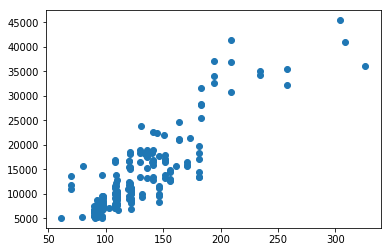

In [30]:
plt.scatter(x=df['engine-size'], y=df['price'])
plt.show()

In [31]:
# In order to start understanding the (linear) relationship 
# between an individual variable and the price. We can do this 
# by using "regplot", which plots the scatterplot plus 
# the fitted regression line for the data.

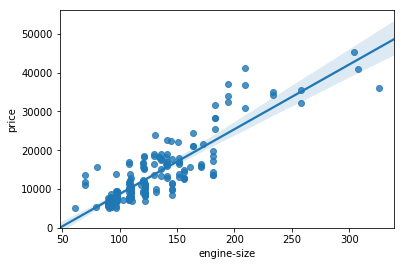

In [53]:
sns.regplot(x=df['engine-size'], y=df['price'])
plt.ylim(0,)
plt.show()

In [50]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


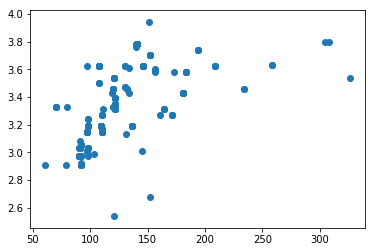

In [54]:
plt.scatter(x=df['engine-size'], y=df['bore'] )
plt.show()

(0, 4.43534601042921)

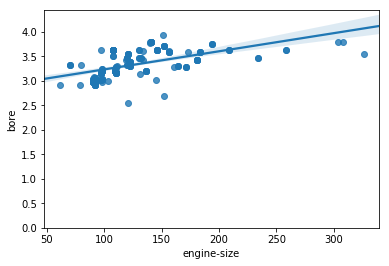

In [48]:
sns.regplot(x=df['engine-size'], y=df['bore'])
plt.ylim(0,)

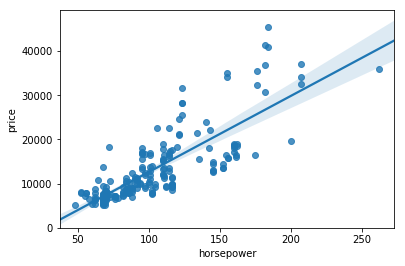

In [55]:
sns.regplot(x=df['horsepower'], y=df['price'])
plt.ylim(0,)
plt.show()

### Negative Linear Relation

(0, 48279.577621586664)

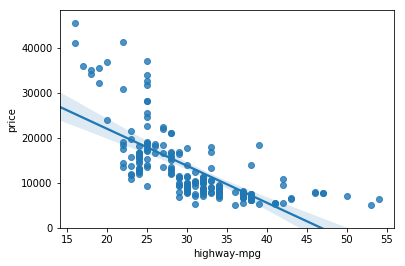

In [58]:
sns.regplot(df['highway-mpg'], y=df['price'])
plt.ylim(0,)

In [55]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


# Weak Linear Relationship

(0, 47436.148325769056)

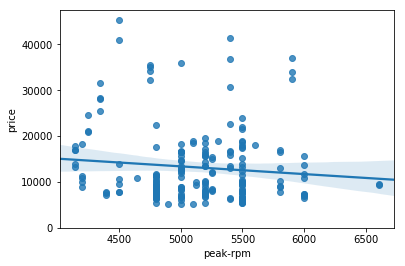

In [58]:
sns.regplot(x=df['peak-rpm'], y=df['price'])
plt.ylim(0,)

In [59]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [60]:
# sns.regplot() - For Numeric Data

# sns.boxplot() - For categorical Data

# Categorical variables

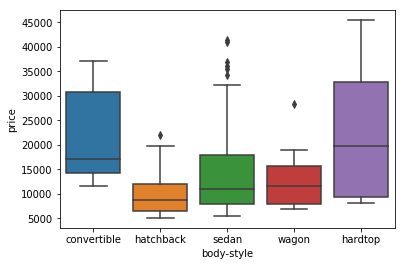

In [63]:
sns.boxplot(x="body-style", y="price", data=df)

In [ ]:
'''
We see that the distributions of price between the 
different body-style categories have a significant overlap,
and so body-style would not be a good predictor of price. 
Let's examine engine "engine-location" and "price

'''

In [66]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

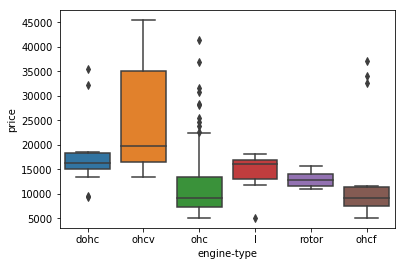

In [68]:
sns.boxplot(x='engine-type', y='price', data=df)

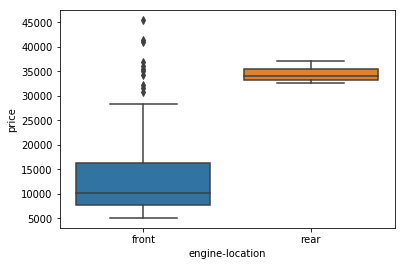

In [69]:
sns.boxplot(x="engine-location", y="price", data=df)

In [ ]:
'''
Here we see that the distribution of price between
these two engine-location categories, front and rear,
are distinct enough to take engine-location as a potential good predictor of price.
'''

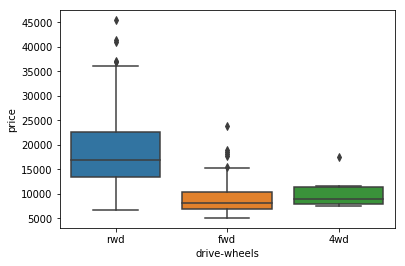

In [70]:
sns.boxplot(x='drive-wheels', y='price', data=df)

In [64]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts

,drive-wheels
fwd,118
rwd,75
4wd,8


In [65]:
drive_wheels_counts.rename(columns={'drive-wheels':'value counts'}, inplace=True)
drive_wheels_counts

,value counts
fwd,118
rwd,75
4wd,8


In [66]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [68]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts

,engine-location
front,198
rear,3


In [69]:
engine_loc_counts.rename(columns={'engine-location':'value counts'}, inplace=True)
engine_loc_counts

,value counts
front,198
rear,3


In [72]:
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value counts
engine-location,
front,198
rear,3


In [74]:
df['engine-type'].value_counts().to_frame()

,engine-type
ohc,145
ohcf,15
ohcv,13
l,12
dohc,12
rotor,4


In [63]:
df['horsepower-binned'].value_counts().to_frame()

,horsepower-binned
Low,115
Medium,62
High,23


In [113]:
df['num-of-doors'].value_counts().to_frame()

,num-of-doors
four,115
two,86


In [122]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [123]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [24]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [38]:
aspiration_counts = df['aspiration'].value_counts().to_frame()
aspiration_counts

,aspiration
std,165
turbo,36


In [39]:
aspiration_counts.rename(columns={'aspiration':'value_counts'}, inplace=True)
aspiration_counts

,value_counts
std,165
turbo,36


In [40]:
aspiration_counts.index.name = "aspiration"
aspiration_counts

,value_counts
aspiration,
std,165
turbo,36
